In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

In [3]:
properties= pd.read_excel(url_LondonHousePrices,sheet_name='Average price',index_col=None)
#importing correct data set

In [4]:
#Cleaning,Transforming, and Visulizing
properties = properties.transpose()
properties = properties.reset_index()

In [5]:
properties.columns = properties.iloc[0]
properties = properties.drop(0)

In [6]:
properties = properties.rename(columns={'Unnamed: 0':'Boroughs',pd.NaT:'ID'})

In [7]:
properties.head()

,Boroughs,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,769391.7847,801999.0466,754435.3943,726332.3166,716776.9539,741942.5522,735180.7726,756917.4193,-,-
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,305012.3291,309560.1023,312131.7237,315701.6799,312395.9053,313831.2545,312673.148,319377.6095,327925.9228,334219.3443
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,528816.4928,532528.0926,537565.6817,536076.0209,537209.2152,530829.6739,533047.739,544260.2024,536408.783,552793.0944
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,346252.9145,352260.8385,355505.8363,358862.3645,361550.8435,362668.366,362279.7488,364125.0704,366331.8295,372338.2445
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,513100.814,495066.6459,512403.8815,515714.1147,522138.5009,504846.3351,511237.093,516787.4064,522216.2429,516259.6453


In [8]:
properties = pd.melt(properties,id_vars=['Boroughs','ID'])

In [9]:
properties.head()

,Boroughs,ID,0,value
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [10]:
properties = properties.rename(columns={0:'Month_Year','value':'Average_price'})

In [11]:
properties['Average_price']= pd.to_numeric(properties['Average_price'],errors = 'coerce')

In [12]:
properties.dtypes

Boroughs                 object
ID                       object
Month_Year       datetime64[ns]
Average_price           float64
dtype: object

In [13]:
properties['Boroughs'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'], dtype=object)

In [14]:
properties[properties['ID'].isna()]

,Boroughs,ID,Month_Year,Average_price
33,Unnamed: 34,NaN,1995-01-01,NaN
36,Unnamed: 37,NaN,1995-01-01,NaN
46,Unnamed: 47,NaN,1995-01-01,NaN
81,Unnamed: 34,NaN,1995-02-01,NaN
84,Unnamed: 37,NaN,1995-02-01,NaN
...,...,...,...,...
15300,Unnamed: 37,NaN,2021-07-01,NaN
15310,Unnamed: 47,NaN,2021-07-01,NaN
15345,Unnamed: 34,NaN,2021-08-01,NaN
15348,Unnamed: 37,NaN,2021-08-01,NaN


In [15]:
properties = properties.dropna()

In [16]:
properties[properties['ID'].isna()]

,Boroughs,ID,Month_Year,Average_price


In [17]:
properties['Boroughs'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Inner London',
       'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'England'], dtype=object)

In [18]:
Not_boroughs = ['Inner London',
       'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'England']

In [19]:
Clean_properties = properties[~properties['Boroughs'].isin(Not_boroughs)]

In [20]:
Clean_properties.head()

,Boroughs,ID,Month_Year,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [21]:
Clean_properties['Boroughs'].unique()
#clean dataset

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster'], dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

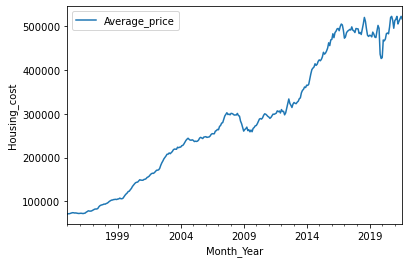

In [22]:
#visualizing data
Brent_prices = Clean_properties[Clean_properties['Boroughs']== 'Brent']
Brent_plot= Brent_prices.plot(x='Month_Year',y='Average_price',kind='line')
Brent_plot.set_ylabel('Housing_cost')
plt.show

In [23]:
Clean_properties['Year']=Clean_properties['Month_Year'].apply(lambda t: t.year)

/var/folders/kd/bwysfml52c98h41vj6wsjspc0000gn/T/ipykernel_7531/391606882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean_properties['Year']=Clean_properties['Month_Year'].apply(lambda t: t.year)


In [24]:
df= Clean_properties.groupby(by=['Boroughs','Year']).mean()

In [25]:
df.tail()

Average_price
Boroughs    Year               
Westminster 2017   1.064772e+06
            2018   1.020025e+06
            2019   9.559986e+05
            2020   9.604692e+05
            2021   9.350438e+05

In [26]:
df=df.reset_index()
df.head()

,Boroughs,Year,Average_price
0,Barking & Dagenham,1995,51817.969390
1,Barking & Dagenham,1996,51718.192690
2,Barking & Dagenham,1997,55974.262309
3,Barking & Dagenham,1998,60285.821083
4,Barking & Dagenham,1999,65320.934441


In [27]:
df.tail()

,Boroughs,Year,Average_price
886,Westminster,2017,1.064772e+06
887,Westminster,2018,1.020025e+06
888,Westminster,2019,9.559986e+05
889,Westminster,2020,9.604692e+05
890,Westminster,2021,9.350438e+05


In [28]:
#modelling function for ration between 1998&2008
def create_price_ratio(d):
    year_1998 = float(d['Average_price'][d['Year']==1998])
    year_2008 = float(d['Average_price'][d['Year']==2008])
    ratio = [year_2008/year_1998]
    return ratio


In [29]:
create_price_ratio(df[df['Boroughs']=='Westminster'])


[2.835202392776575]

In [30]:
Final = {}
for i in df['Boroughs'].unique():
    borough = df[df['Boroughs']== i]
    Final[i] = create_price_ratio(borough)
    print(Final)

{'Barking & Dagenham': [3.1078098036410444]}
{'Barking & Dagenham': [3.1078098036410444], 'Barnet': [2.6971620479893006]}
{'Barking & Dagenham': [3.1078098036410444], 'Barnet': [2.6971620479893006], 'Bexley': [2.6068946499128787]}
{'Barking & Dagenham': [3.1078098036410444], 'Barnet': [2.6971620479893006], 'Bexley': [2.6068946499128787], 'Brent': [2.9074424911031915]}
{'Barking & Dagenham': [3.1078098036410444], 'Barnet': [2.6971620479893006], 'Bexley': [2.6068946499128787], 'Brent': [2.9074424911031915], 'Bromley': [2.564746932441681]}
{'Barking & Dagenham': [3.1078098036410444], 'Barnet': [2.6971620479893006], 'Bexley': [2.6068946499128787], 'Brent': [2.9074424911031915], 'Bromley': [2.564746932441681], 'Camden': [2.9364710845105013]}
{'Barking & Dagenham': [3.1078098036410444], 'Barnet': [2.6971620479893006], 'Bexley': [2.6068946499128787], 'Brent': [2.9074424911031915], 'Bromley': [2.564746932441681], 'Camden': [2.9364710845105013], 'City of London': [2.886518235071261]}
{'Barking 

In [31]:
df_ratios = pd.DataFrame(Final)

In [32]:
df_ratios.head()


,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,3.10781,2.697162,2.606895,2.907442,2.564747,2.936471,2.886518,2.677444,2.652382,2.642575,...,2.782739,3.277143,2.797769,2.512266,3.185961,2.635571,3.087941,3.082243,2.901099,2.835202


In [33]:
df_new=df_ratios.T.reset_index()

In [34]:
df_new=df_new.rename(columns = {'index':'London_Boroughs',0:'2018'})

In [35]:
df_new.head()

,London_Boroughs,2018
0,Barking & Dagenham,3.107810
1,Barnet,2.697162
2,Bexley,2.606895
3,Brent,2.907442
4,Bromley,2.564747


<AxesSubplot:xlabel='London_Boroughs'>

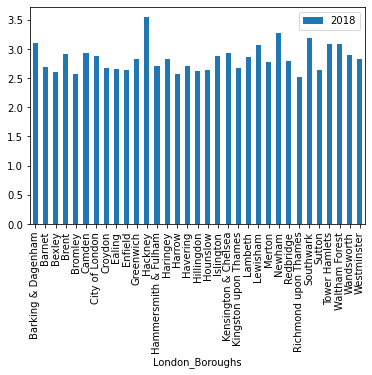

In [36]:
df_new.plot(x='London_Boroughs',y='2018',kind='bar')

In [37]:
df_new = df_new.sort_values(by='2018',ascending = False)
df_new.head(15)

,London_Boroughs,2018
11,Hackney,3.548107
24,Newham,3.277143
27,Southwark,3.185961
0,Barking & Dagenham,3.107810
29,Tower Hamlets,3.087941
30,Waltham Forest,3.082243
22,Lewisham,3.061776
5,Camden,2.936471
19,Kensington & Chelsea,2.924667
3,Brent,2.907442


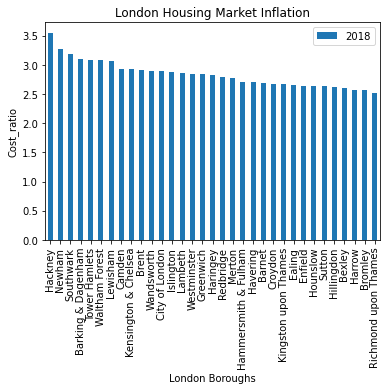

In [38]:
data_plot=df_new.plot(x='London_Boroughs',y='2018',kind='bar',xlabel='London Boroughs',ylabel='Cost_ratio',title='London Housing Market Inflation')

In [39]:
top15 = df_new.head(15)

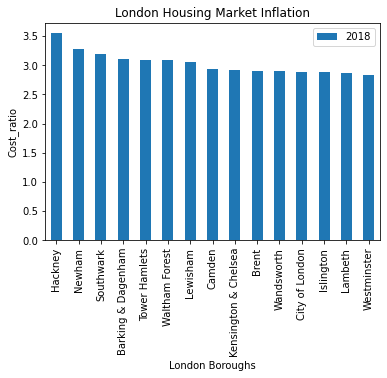

In [40]:
top15_plot=top15.plot(x='London_Boroughs',y='2018',kind='bar',xlabel='London Boroughs',ylabel='Cost_ratio',title='London Housing Market Inflation')